# Practice PS07: Outlier analysis

Author: <font color="blue">Rubén Vera Martínez</font>

E-mail: <font color="blue">ruben.vera01@estudiant.upf.edu</font>

Date: <font color="blue">18/11/2022</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

In [3]:
display(df.head(10))
number_patients = len(df)
print('Total number of patients: ', number_patients)

normal = len(df.loc[df['result'].isin(['normal'])])/len(df['result'])
print('percentage of patients with normal thyroid: ', normal)

abnormal = len(df.loc[df['result'].isin(['abnormal'])])/len(df['result'])
print('percentage of patients with abnormal thyroid: ', abnormal)

,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal
9,0.76,0.00010,0.029,0.124,0.128,0.097,normal


Total number of patients:  7200
percentage of patients with normal thyroid:  0.9258333333333333
percentage of patients with abnormal thyroid:  0.07416666666666667


In [4]:
normal = df.loc[df['result'].isin(['normal'])]
means_normal = normal[['f1', 'f2','f3', 'f4', 'f5', 'f6']].mean()
print(means_normal)
display(normal.head(10))

abnormal = df.loc[df['result'].isin(['abnormal'])]
means_abnormal = abnormal[['f1', 'f2','f3', 'f4', 'f5', 'f6']].mean()
print(means_abnormal)
display(abnormal.head(10))

f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal
9,0.76,0.00010,0.029,0.124,0.128,0.097,normal


f1    0.548034
f2    0.039363
f3    0.014891
f4    0.074940
f5    0.099500
f6    0.076803
dtype: float64


,f1,f2,f3,f4,f5,f6,result
10,0.62,0.01100,0.0080,0.0730,0.074,0.0980,abnormal
19,0.50,0.06100,0.0096,0.0130,0.116,0.0110,abnormal
27,0.78,0.02500,0.0090,0.0500,0.084,0.0600,abnormal
43,0.61,0.00979,0.0040,0.0810,0.064,0.1260,abnormal
84,0.56,0.00820,0.0200,0.0660,0.094,0.0700,abnormal
105,0.73,0.04700,0.0110,0.0520,0.090,0.0580,abnormal
115,0.43,0.07000,0.0050,0.0029,0.104,0.0028,abnormal
116,0.42,0.03100,0.0080,0.0130,0.119,0.0110,abnormal
145,0.78,0.00630,0.0110,0.0560,0.086,0.0650,abnormal
147,0.53,0.02500,0.0040,0.0390,0.061,0.0640,abnormal


Looking at means:
- f2 could be useful. So, if you have larger value in f2, you're closely to an abnormal result.
- f4 could be also. So, if you have larger value in f4 you're closely to a normal result
- f6 could be useful. So, if you have larger value in f6, you're closely to a normal result.

I think those could be useful because it's where the means differ more between normal and abnormal.

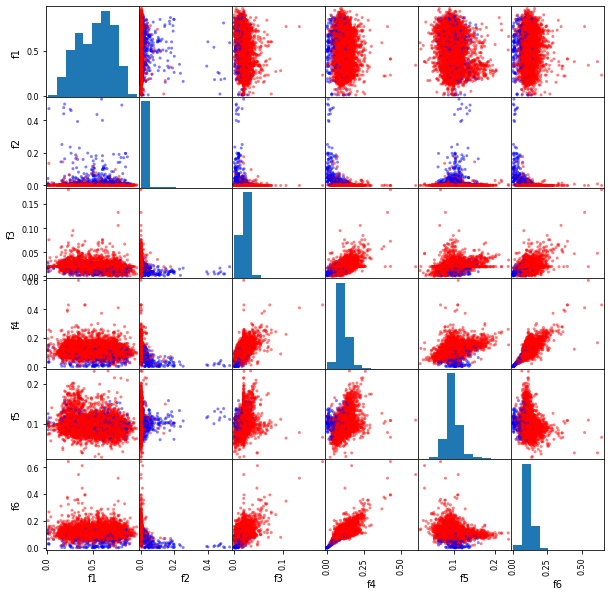

In [5]:
color_code = {'abnormal': 'blue', 'normal': 'red'}

colors = df['result'].apply(lambda x: color_code[x])

figure = pd.plotting.scatter_matrix(df, c=colors, figsize = (10,10))

In f1, we can't observe any significant difference along the comparisons with other features.

In f2, comparing all features there are large values of abnormal results while for normal results we can observe all values are closer to 0.

In f3, we

Comparing f3 and f4 with f1,f3/f4,f5 and f6 we can observe larger values for normal than abnormal ones. But on f4/f3-f2 we can observe that see a difference. Here, blue ones are larger on f2 axis and really close to 0 on f4 axis.

Comparing f5 with f3,f4 and f6 abnormal results are close to 0 on f3,f4 and f6 axis while normal ones, are larger but not too much. And in f5-f2 it happens the same I mentioned on f2.

Looking at f6, it has larger value son abnormal results, while on normal results we they are close to 0 on f6 axis.



# 1. Create isolation tree

## 1.1. Random dimension and random split

In [6]:
def pick_random_dimension(df, columns_to_ignore):
    columns = set(df.columns)
    for column in columns_to_ignore:
        columns.remove(column)
    return random.sample(columns, 1)[0]

In [7]:
#Calls to the function
print(pick_random_dimension(normal, ['result']))
pick_random_dimension(normal, ['result'])

f5


'f5'

In [8]:
def pick_random_split(df, dimension):
    return random.uniform(np.min(df[dimension]), np.max(df[dimension]))

In [9]:
display(pick_random_split(normal, pick_random_dimension(normal, ['result'])))
pick_random_split(normal, pick_random_dimension(normal, ['result']))

0.255717191568194

0.5990341479564588

## 1.2. Implement split data into two

In [10]:
def split_dataset(df, dimension, split):
    return df[df[dimension] <= split], df[df[dimension] > split]
    

In [11]:
(left, right) = split_dataset(df, 'f1', 0.4)
display(left)
print('minimum and maximum value of left: ', np.min(left['f1']), 'and', np.max(left['f1']))
display(right)
print('minimum and maximum value of right: ', np.min(right['f1']), 'and', np.max(right['f1']))


,f1,f2,f3,f4,f5,f6,result
1,0.24,0.00025,0.0300,0.143,0.133,0.108,normal
4,0.23,0.00025,0.0260,0.139,0.090,0.153,normal
11,0.18,0.00010,0.0230,0.098,0.085,0.115,normal
15,0.39,0.00010,0.0180,0.090,0.071,0.126,normal
16,0.39,0.00060,0.0200,0.114,0.100,0.114,normal
...,...,...,...,...,...,...,...
7166,0.36,0.00097,0.0201,0.101,0.077,0.131,normal
7167,0.36,0.00340,0.0469,0.172,0.087,0.198,normal
7179,0.33,0.00230,0.0201,0.077,0.083,0.093,normal
7180,0.30,0.00170,0.0230,0.083,0.081,0.102,normal


minimum and maximum value of left:  0.01 and 0.4


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
2,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
5,0.69,0.00025,0.0160,0.086,0.070,0.1230,normal
6,0.85,0.00025,0.0230,0.128,0.104,0.1210,normal
...,...,...,...,...,...,...,...
7194,0.79,0.00490,0.0201,0.077,0.082,0.0940,normal
7195,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal


minimum and maximum value of right:  0.41 and 0.97


## 1.3. Create one isolation tree

In [12]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


In [13]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        dimension = pick_random_dimension(data, columns_to_ignore)
        split = pick_random_split(data, dimension)
        (left_a, right_a) = split_dataset(data, dimension, split)
        left = isolation_tree(left_a, columns_to_ignore, min_items)
        right = isolation_tree(right_a, columns_to_ignore, min_items)
        tree = {"left": left, "right": right, "dimension": dimension, "split": split}
        return tree

In [14]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)

In [15]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [16]:
print(tree_to_nodes(mytree))

:'internal node: f6 <= 0.16'
-<:'internal node: f2 <= 0.46'
--<:'internal node: f2 <= 0.10'
---<:'internal node: f2 <= 0.01'
----<:'internal node: f3 <= 0.04'
-----<:'internal node: f5 <= 0.23'
------<:'internal node: f4 <= 0.19'
-------<:'internal node: f4 <= 0.13'
--------<:'internal node: f5 <= 0.05'
---------<:'external node: 18 normal + 0 abnormal'
--------->:'internal node: f2 <= 0.00'
----------<:'internal node: f5 <= 0.13'
-----------<:'internal node: f6 <= 0.02'
------------<:'external node: 3 normal + 0 abnormal'
------------>:'internal node: f5 <= 0.13'
-------------<:'internal node: f4 <= 0.03'
--------------<:'external node: 1 normal + 0 abnormal'
-------------->:'internal node: f6 <= 0.10'
---------------<:'external node: 858 normal + 0 abnormal'
--------------->:'internal node: f4 <= 0.06'
----------------<:'external node: 3 normal + 0 abnormal'
---------------->:'internal node: f1 <= 0.53'
-----------------<:'external node: 1217 normal + 0 abnormal'
----------------->:'

In [17]:
def get_max_tree_depth(tree):
    #Maximum depth will be the number of internal_nodes + 1 (external nodes)
    internal_nodes = 0
    nodes = str(tree_to_nodes(tree))
    for node in range(len(nodes)):
        #The node will only be internal if it has an i (due to external has no i)
        if 'i' in nodes[node]:
            internal_nodes += 1
    return internal_nodes + 1

In [18]:
get_max_tree_depth(mytree)

18

# 2. Create isolation forests and find depth of items


## 2.1. Create an isolation forest

In [19]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    returning = [dict() for x in range(num_trees)] #Create a dictionary
    #We do "num_trees" isolation trees 
    for i in range(num_trees):
        returning[i] = isolation_tree(dfi, columns_to_ignore, min_items)
    return returning

In [20]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 100
num_trees = 30


In [21]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 30 trees


In [22]:
# Leave this code as-is

for i in range(0, 3):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f4 <= 0.44'
-<:'internal node: f2 <= 0.42'
--<:'internal node: f6 <= 0.28'
---<:'internal node: f1 <= 0.40'
----<:'internal node: f6 <= 0.05'
-----<:'external node: 27 normal + 28 abnormal'
----->:'internal node: f1 <= 0.18'
------<:'internal node: f2 <= 0.00'
-------<:'external node: 21 normal + 0 abnormal'
------->:'internal node: f1 <= 0.15'
--------<:'external node: 65 normal + 6 abnormal'
-------->:'external node: 83 normal + 3 abnormal'
------>:'internal node: f6 <= 0.23'
-------<:'internal node: f6 <= 0.18'
--------<:'internal node: f5 <= 0.12'
---------<:'internal node: f5 <= 0.11'
----------<:'internal node: f3 <= 0.03'
-----------<:'internal node: f4 <= 0.05'
------------<:'external node: 5 normal + 0 abnormal'
------------>:'internal node: f6 <= 0.11'
-------------<:'internal node: f1 <= 0.21'
--------------<:'external node: 55 normal + 4 abnormal'
-------------->:'internal node: f2 <= 0.03'
---------------<:'internal node: f4 <= 0.11'
--------

:'internal node: f3 <= 0.05'
-<:'internal node: f2 <= 0.24'
--<:'internal node: f4 <= 0.27'
---<:'internal node: f3 <= 0.03'
----<:'internal node: f5 <= 0.07'
-----<:'internal node: f3 <= 0.03'
------<:'internal node: f2 <= 0.19'
-------<:'internal node: f6 <= 0.31'
--------<:'internal node: f1 <= 0.26'
---------<:'external node: 15 normal + 0 abnormal'
--------->:'internal node: f4 <= 0.08'
----------<:'internal node: f6 <= 0.04'
-----------<:'external node: 1 normal + 1 abnormal'
----------->:'internal node: f6 <= 0.10'
------------<:'external node: 62 normal + 16 abnormal'
------------>:'internal node: f5 <= 0.03'
-------------<:'external node: 2 normal + 0 abnormal'
------------->:'internal node: f3 <= 0.01'
--------------<:'external node: 36 normal + 2 abnormal'
-------------->:'external node: 77 normal + 3 abnormal'
---------->:'internal node: f6 <= 0.23'
-----------<:'internal node: f1 <= 0.88'
------------<:'internal node: f6 <= 0.19'
-------------<:'internal node: f2 <= 0.00'


## 2.2. Find the average depth of an item

In [23]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [24]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 18
Depths for normal items
- id=P1349 is at depth 17/18
- id=P3485 is at depth 17/18
- id=P2101 is at depth 17/18
- id=P2041 is at depth 10/18
- id=P0056 is at depth 17/18
Depths for abnormal items
- id=P6877 is at depth 4/18
- id=P3920 is at depth 4/18
- id=P5877 is at depth 4/18
- id=P3281 is at depth 4/18
- id=P6284 is at depth 10/18

On first tree of forest, having maximum depth 202
Depths for normal items
- id=P2284 is at depth 18/202
- id=P6201 is at depth 16/202
- id=P4039 is at depth 16/202
- id=P0565 is at depth 10/202
- id=P2599 is at depth 16/202
Depths for abnormal items
- id=P7051 is at depth 21/202
- id=P2057 is at depth 22/202
- id=P1416 is at depth 26/202
- id=P2046 is at depth 11/202
- id=P5605 is at depth 22/202



in the case of Shallow tree, the depth between normal and abnormal items don't follow the same direction. As you can see, depth of P5970 >>>> depth of all normal items while the others have less depth.
On the other hand, on first tree of forest, abnorlam items are closer to have less depth than normal ones

In [25]:
def find_average_depth(forest, column_name, value):
    depths = [0]*len(forest)
    #For each forest we find the depth of the elements and store them in depths.
    for i in range(len(forest)):
        depths[i] = find_element_depth(forest[i], column_name, value)
    return sum(depths)/len(depths)
    

In [26]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P4447 is at average depth 16.9
- id=P6880 is at average depth 20.6
- id=P6794 is at average depth 21.5
- id=P1207 is at average depth 19.7
- id=P4592 is at average depth 21.7

Average depths for abnormal items
- id=P3733 is at average depth 18.3
- id=P0569 is at average depth 10.1
- id=P1943 is at average depth 15.1
- id=P1773 is at average depth 15.4
- id=P5228 is at average depth 19.6



I'd average all the dataset without distinction between normal or abnormal. I'd use some existing algorithm that finds the element with less cost than function made.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [27]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(50))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(50))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P3506', 'P2910', 'P6088', 'P6847', 'P1249', 'P2819', 'P6560', 'P7128', 'P6554', 'P5742', 'P6617', 'P4724', 'P2418', 'P3786', 'P6717', 'P0319', 'P1864', 'P6761', 'P2140', 'P6338', 'P7036', 'P5855', 'P0523', 'P4013', 'P3860', 'P5355', 'P3866', 'P1977', 'P2118', 'P4919', 'P4519', 'P2561', 'P3986', 'P2730', 'P1994', 'P5561', 'P1224', 'P1785', 'P1012', 'P4270', 'P3161', 'P1139', 'P4476', 'P4386', 'P2096', 'P1576', 'P3765', 'P0972', 'P4439', 'P0454']
Abnormal point sample ids : ['P6805', 'P4625', 'P5909', 'P2383', 'P7197', 'P5957', 'P0116', 'P1541', 'P7068', 'P0344', 'P5251', 'P5125', 'P6431', 'P3773', 'P5000', 'P0943', 'P4077', 'P0028', 'P1538', 'P0463', 'P3863', 'P5258', 'P3842', 'P4874', 'P5614', 'P3372', 'P1189', 'P0861', 'P2120', 'P0011', 'P3305', 'P3783', 'P1943', 'P1524', 'P0921', 'P3056', 'P3920', 'P4672', 'P4396', 'P3264', 'P2445', 'P6457', 'P4968', 'P3571', 'P1809', 'P4676', 'P2932', 'P3949', 'P7059', 'P3206']


In [28]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P3506 is at average depth 12.87
 element id=P2910 is at average depth 23.70
 element id=P6088 is at average depth 22.47
 element id=P6847 is at average depth 23.10
 element id=P1249 is at average depth 20.73
 element id=P2819 is at average depth 16.73
 element id=P6560 is at average depth 21.53
 element id=P7128 is at average depth 22.33
 element id=P6554 is at average depth 20.73
 element id=P5742 is at average depth 15.30
 element id=P6617 is at average depth 17.60
 element id=P4724 is at average depth 17.30
 element id=P2418 is at average depth 20.23
 element id=P3786 is at average depth 18.27
 element id=P6717 is at average depth 18.93
 element id=P0319 is at average depth 22.37
 element id=P1864 is at average depth 15.20
 element id=P6761 is at average depth 20.10
 element id=P2140 is at average depth 14.13
 element id=P6338 is at average depth 16.80
 element id=P7036 is at average depth 22.97
 element id=P5855 is at average dept

In [29]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P6805 is at average depth 19.13
 element id=P4625 is at average depth 9.97
 element id=P5909 is at average depth 17.90
 element id=P2383 is at average depth 11.83
 element id=P7197 is at average depth 6.57
 element id=P5957 is at average depth 7.00
 element id=P0116 is at average depth 7.43
 element id=P1541 is at average depth 18.90
 element id=P7068 is at average depth 19.80
 element id=P0344 is at average depth 15.00
 element id=P5251 is at average depth 19.17
 element id=P5125 is at average depth 4.57
 element id=P6431 is at average depth 9.07
 element id=P3773 is at average depth 15.73
 element id=P5000 is at average depth 15.27
 element id=P0943 is at average depth 18.43
 element id=P4077 is at average depth 8.47
 element id=P0028 is at average depth 11.90
 element id=P1538 is at average depth 14.80
 element id=P0463 is at average depth 18.30
 element id=P3863 is at average depth 6.53
 element id=P5258 is at average depth 16.6

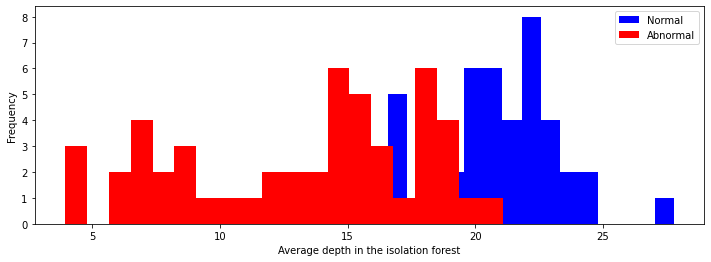

In [30]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We see that the mean of the depth of abnormal items is lower than the mean of normal items. So, items with low depth will be probably normal. Otherwise, items with high depth(more than 16 or something like this) will be probably abnormal.

## 3.2. Compute outlier scores and conclude

Use this fast method to compute harmonic numbers. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [31]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

With this and the formula seen in class, you can compute outlier scores. The function below, which you should leave as-is, uses the *factory* design pattern to avoid computing *c(n)* every time the outlier score needs to be computed.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [32]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

Finally, we plot an histogram of outlier scores of normal and abnormal items.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

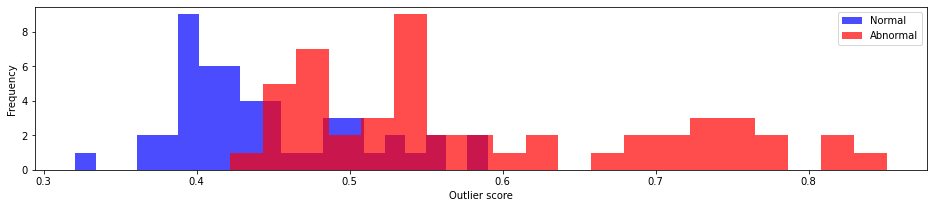

In [33]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The mean of the outlier score of normal items is lower than mean of the outlier score of abnormal items. So, when we see that an item has a higher outlier score we can classify it as an abnormal with high confidence, and viceversa.

In [34]:
normal = []
abnormal = []
outlier_scores = normal_scores + abnormal_scores
threshold = np.mean(outlier_scores)
#We predict the items classyfing them in the corresponding class based in threshold.
for i in range(len(outlier_scores)):
    if(outlier_scores[i] <= threshold):
        normal.append(outlier_scores[i])
    else:
        abnormal.append(outlier_scores[i])

In [35]:
def binary_search(arr, low, high, x):
    #check base case
    if high >= low:
        mid = (high + low) // 2
        
        #If element is present at the middle itself
        if arr[mid] == x:
            return mid
        #If element is smaller than mid, then it can only be present in left subarray
        elif arr[mid]>x:
            return binary_search(arr, low, mid - 1, x)
        #Else the element can obly be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
    else:
        #Element is not present in the array
        return -1
    
isnormal_normal_threshold = 0 #Is normal and we predict normal
isnormal_abnormal_threshold = 0 #Is normal and we predict abnormal
isabnormal_normal_threshold = 0 #Is abnormal and we predict normal
isabnormal_abnormal_threshold = 0 #Is abnormal and we predict abnormal
#Compute number of times that each thing happens
for i in range(len(normal)):
    if binary_search(normal_scores, 0, len(normal_scores)-1, normal[i]) != -1:
        isnormal_normal_threshold+=1
    else:
        isnormal_abnormal_threshold+=1
        
for i in range(len(abnormal)):
    if binary_search(abnormal_scores, 0, len(abnormal_scores)-1, abnormal[i]) != -1:
        isabnormal_abnormal_threshold+=1
    else:
        isabnormal_normal_threshold+=1

#Compute false positive rate as the ratio of number of abnormal items predicted that were not abnormal
#Compute false negative rate as the ratio of number of normal items predicted that were not normal
false_positive_rate = isnormal_abnormal_threshold/ (isnormal_abnormal_threshold + isnormal_normal_threshold)
false_negative_rate = isabnormal_normal_threshold/ (isabnormal_normal_threshold + isabnormal_abnormal_threshold)
print("false_positive_rate: ", false_positive_rate)
print("false_negative_rate: ", false_negative_rate)

false_positive_rate:  0.9298245614035088
false_negative_rate:  0.8837209302325582


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>